## Example Project #2

## Introduction and Goal

#### Europe is home to the most elite of soccer leagues including the Big Five. The Big Five refers to the domestic leagues of England, Spain, Italy, Germany, and France. However, there is often debate as to which of these is the most competitive, with the arguments usually boiling down to between England and Spain, or the Premier League and La Liga respectively. The purpose of my final project is to see if statisics can point to a winner or atleast confirm that the discussion should be centered around the Premier League and La Liga. I will be omitting the domestic league in France as its differs in its structure from the rest in a key metric.

#### Competitiveness does not have a clear and defined metric so I will present several metrics that I will analyze that I have researched to be in some way indicative of competitiveness. These metrics are: 
- Difference in points between first and second place
- Average points per position
- Percentage of games drawn
- Performance in the Champions League (a competition in which teams from the top European Leagues compete against eachother directly)

#### Each of these metrics will be analyzed with the past 5 seasons of data for each of the four leagues and be further explained in their respective sections. Furthermore, I will be assessing the relationships that certain metrics may have with eachother such as, is there a relationship between the difference of points between first and second place from a certain league and that league's performance in the Champions League that season.


## Difference in Points Between The League Champion and Runner-Up

#### By looking at the difference in points between the winner and runner up of a league we are inherently seeing how competitive the race for first place was in that league. A league that has a close title race can be seen as more competitve than a league that has a clear winner with a large gap between first and second place.

In [73]:
#Importing neccesary packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Scraping Premier League 2017-18 final standings
pl_1718 = pd.read_html("https://en.wikipedia.org/wiki/Template:2017%E2%80%9318_Premier_League_table", header = 0)[0]
pl_1718 = pl_1718[['Pos', 'Team[ vte ]', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]
pl_1718['Pts'] = pd.to_numeric(pl_1718['Pts'])

#Scraping Premier League 2016-17 final standings
pl_1617 = pd.read_html("https://en.wikipedia.org/wiki/Template:2016%E2%80%9317_Premier_League_table", header = 0)[0]
pl_1617 = pl_1617[['Pos', 'Team[ vte ]', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]

#Scraping Premier League 2015-16 final standings
pl_1516 = pd.read_html("https://en.wikipedia.org/wiki/Template:2015%E2%80%9316_Premier_League_table", header = 0)[0]
pl_1516 = pl_1516[['Pos', 'Team[ vte ]', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]

#Scraping Premier League 2014-15 final standings
pl_1415 = pd.read_html("https://en.wikipedia.org/wiki/Template:2014%E2%80%9315_Premier_League_table", header = 0)[0]
pl_1415 = pl_1415[['Pos', 'Team[ vte ]', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]

#Scraping Premier League 2013-14 final standings
pl_1314 = pd.read_html("https://en.wikipedia.org/wiki/Template:2013%E2%80%9314_Premier_League_table", header = 0)[0]
pl_1314 = pl_1314[['Pos', 'Team[ vte ]', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]

In [4]:
#Scraping La Liga 2017-18 final standings
ll_1718 = pd.read_html("https://www.skysports.com/la-liga-table/2017", header = 0)[0]
ll_1718 = ll_1718[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping La Liga 2016-17 final standings
ll_1617 = pd.read_html("https://www.skysports.com/la-liga-table/2016", header = 0)[0]
ll_1617 = ll_1617[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping La Liga 2015-16 final standings
ll_1516 = pd.read_html("https://www.skysports.com/la-liga-table/2015", header = 0)[0]
ll_1516 = ll_1516[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping La Liga 2014-15 final standings
ll_1415 = pd.read_html("https://www.skysports.com/la-liga-table/2014", header = 0)[0]
ll_1415 = ll_1415[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping La Liga 2013-14 final standings
ll_1314 = pd.read_html("https://www.skysports.com/la-liga-table/2013", header = 0)[0]
ll_1314 = ll_1314[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

In [5]:
#Scraping Serie A 2017-18 final standings
sa_1718 = pd.read_html("https://www.skysports.com/serie-a-table/2017", header = 0)[0]
sa_1718 = sa_1718[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Serie A 2016-17 final standings
sa_1617 = pd.read_html("https://www.skysports.com/serie-a-table/2016", header = 0)[0]
sa_1617 = sa_1617[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Serie A 2015-16 final standings
sa_1516 = pd.read_html("https://www.skysports.com/serie-a-table/2015", header = 0)[0]
sa_1516 = sa_1516[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Serie A 2014-15 final standings
sa_1415 = pd.read_html("https://www.skysports.com/serie-a-table/2014", header = 0)[0]
sa_1415 = sa_1415[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Serie A 2013-14 final standings
sa_1314 = pd.read_html("https://www.skysports.com/serie-a-table/2013", header = 0)[0]
sa_1314 = sa_1314[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

In [6]:
#Scraping Bundesliga 2017-18 final standings
bl_1718 = pd.read_html("https://www.skysports.com/bundesliga-table/2017", header = 0)[0]
bl_1718 = bl_1718[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Bundesliga 2016-17 final standings
bl_1617 = pd.read_html("https://www.skysports.com/bundesliga-table/2016", header = 0)[0]
bl_1617 = bl_1617[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Bundesliga 2015-16 final standings
bl_1516 = pd.read_html("https://www.skysports.com/bundesliga-table/2015", header = 0)[0]
bl_1516 = bl_1516[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Bundesliga 2014-15 final standings
bl_1415 = pd.read_html("https://www.skysports.com/bundesliga-table/2014", header = 0)[0]
bl_1415 = bl_1415[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

#Scraping Bundesliga 2013-14 final standings
bl_1314 = pd.read_html("https://www.skysports.com/bundesliga-table/2013", header = 0)[0]
bl_1314 = bl_1314[['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts']]

In [7]:
#Constructing DataFrame of Differences Between First and Second For All 4 Leagues
difference_first_second = pd.DataFrame(np.array([ ["2017-18", pl_1718["Pts"][0] - pl_1718["Pts"][1],ll_1718["Pts"][0] - ll_1718["Pts"][1],sa_1718["Pts"][0] - sa_1718["Pts"][1], bl_1718["Pts"][0] - bl_1718["Pts"][1]], 
                                                 ["2016-17", pl_1617["Pts"][0] - pl_1617["Pts"][1],ll_1617["Pts"][0] - ll_1617["Pts"][1],sa_1617["Pts"][0] - sa_1617["Pts"][1], bl_1617["Pts"][0] - bl_1617["Pts"][1]], 
                                                 ["2015-16", pl_1516["Pts"][0] - pl_1516["Pts"][1],ll_1516["Pts"][0] - ll_1516["Pts"][1],sa_1516["Pts"][0] - sa_1516["Pts"][1], bl_1516["Pts"][0] - bl_1516["Pts"][1]], 
                                                ["2014-15", pl_1415["Pts"][0] - pl_1415["Pts"][1],ll_1415["Pts"][0] - ll_1415["Pts"][1],sa_1415["Pts"][0] - sa_1415["Pts"][1], bl_1415["Pts"][0] - bl_1415["Pts"][1]], 
                                                ["2013-14", pl_1314["Pts"][0] - pl_1314["Pts"][1],ll_1314["Pts"][0] - ll_1314["Pts"][1],sa_1314["Pts"][0] - sa_1314["Pts"][1], bl_1314["Pts"][0] - bl_1314["Pts"][1]]]), columns = ["Season", 'Premier League', 'La Liga', 'Serie A', 'Bundesliga'])

#Converting all columns except "Season" to ints
difference_first_second["Premier League"] = pd.to_numeric(difference_first_second["Premier League"])
difference_first_second["La Liga"] = pd.to_numeric(difference_first_second["La Liga"])
difference_first_second["Serie A"] = pd.to_numeric(difference_first_second["Serie A"])
difference_first_second["Bundesliga"] = pd.to_numeric(difference_first_second["Bundesliga"])
#print(difference_first_second)

    Season  Premier League  La Liga  Serie A  Bundesliga
0  2017-18              19       14        4          21
1  2016-17               7        3        4          15
2  2015-16              10        1        9          10
3  2014-15               8        2       17          10
4  2013-14               2        3       17          19


Text(0, 0.5, 'Difference in Points')

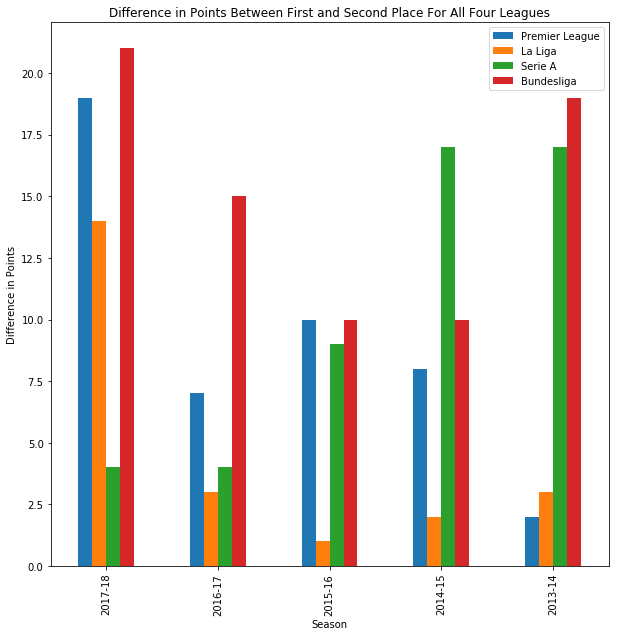

In [8]:
print(difference_first_second)
plt_pt_diff = difference_first_second.plot(kind = 'bar', x = 'Season',y = ['Premier League', 'La Liga', 'Serie A', 'Bundesliga'], title = "Difference in Points Between First and Second Place For All Four Leagues", figsize = (10,10))
plt_pt_diff.set_xlabel("Season")
plt_pt_diff.set_ylabel("Difference in Points")

In [9]:
#Mean Difference in the Premier League
difference_first_second["Premier League"].mean()

9.2

In [10]:
#Mean Difference in the La Liga
difference_first_second["La Liga"].mean()

4.6

In [11]:
#Mean Difference in the Serie A
difference_first_second["Serie A"].mean()

10.2

In [12]:
#Mean Difference in the Bundesliga
difference_first_second["Bundesliga"].mean()

15.0

#### As we can see from the bar graph, the Bundesliga almost always has the highest difference of points while the La Liga usually has the lowest difference between first and second at the end of the season. As a matter of fact, the average difference in points over the last 5 seasons in the La Liga is only 4.6 which is half of the Premier League's average which comes in second. When considering a match win gives you 3 points in all leagues, the winner of the La Liga is only ahead of second place by slightly more than the points received from a single win showing that the winners of the La Liga can usually be decided by a single match. In terms of competitiveness in the race for first place, La Liga is the clear winner.

In [13]:
#Constructing DataFrame of Differences Between First and Fourth For All 4 Leagues
difference_first_fourth = pd.DataFrame(np.array([ ["2017-18", pl_1718["Pts"][0] - pl_1718["Pts"][3],ll_1718["Pts"][0] - ll_1718["Pts"][3],sa_1718["Pts"][0] - sa_1718["Pts"][3], bl_1718["Pts"][0] - bl_1718["Pts"][3]], 
                                                 ["2016-17", pl_1617["Pts"][0] - pl_1617["Pts"][3],ll_1617["Pts"][0] - ll_1617["Pts"][3],sa_1617["Pts"][0] - sa_1617["Pts"][3], bl_1617["Pts"][0] - bl_1617["Pts"][3]], 
                                                 ["2015-16", pl_1516["Pts"][0] - pl_1516["Pts"][3],ll_1516["Pts"][0] - ll_1516["Pts"][3],sa_1516["Pts"][0] - sa_1516["Pts"][3], bl_1516["Pts"][0] - bl_1516["Pts"][3]], 
                                                ["2014-15", pl_1415["Pts"][0] - pl_1415["Pts"][3],ll_1415["Pts"][0] - ll_1415["Pts"][3],sa_1415["Pts"][0] - sa_1415["Pts"][3], bl_1415["Pts"][0] - bl_1415["Pts"][3]], 
                                                ["2013-14", pl_1314["Pts"][0] - pl_1314["Pts"][3],ll_1314["Pts"][0] - ll_1314["Pts"][3],sa_1314["Pts"][0] - sa_1314["Pts"][3], bl_1314["Pts"][0] - bl_1314["Pts"][3]]]), columns = ["Season", 'Premier League', 'La Liga', 'Serie A', 'Bundesliga'])

#Converting all columns except "Season" to ints
difference_first_fourth["Premier League"] = pd.to_numeric(difference_first_fourth["Premier League"])
difference_first_fourth["La Liga"] = pd.to_numeric(difference_first_fourth["La Liga"])
difference_first_fourth["Serie A"] = pd.to_numeric(difference_first_fourth["Serie A"])
difference_first_fourth["Bundesliga"] = pd.to_numeric(difference_first_fourth["Bundesliga"])
print(difference_first_fourth)

    Season  Premier League  La Liga  Serie A  Bundesliga
0  2017-18              25       20       23          29
1  2016-17              17       21       19          20
2  2015-16              15       27       24          33
3  2014-15              17       17       23          18
4  2013-14               7       20       37          29


    Season  Premier League  La Liga  Serie A  Bundesliga
0  2017-18              25       20       23          29
1  2016-17              17       21       19          20
2  2015-16              15       27       24          33
3  2014-15              17       17       23          18
4  2013-14               7       20       37          29


Text(0, 0.5, 'Difference in Points')

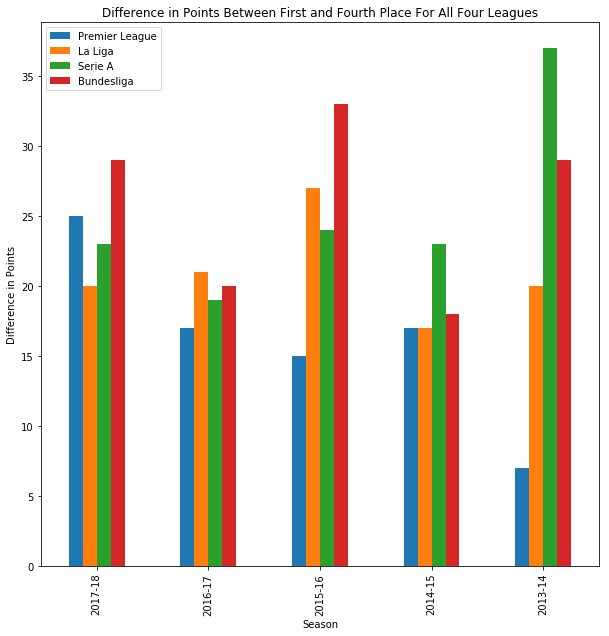

In [14]:
print(difference_first_fourth)
plt_pt_diff = difference_first_fourth.plot(kind = 'bar', x = 'Season',y = ['Premier League', 'La Liga', 'Serie A', 'Bundesliga'], title = "Difference in Points Between First and Fourth Place For All Four Leagues", figsize = (10,10))
plt_pt_diff.set_xlabel("Season")
plt_pt_diff.set_ylabel("Difference in Points")

In [15]:
#Mean Difference in the Premier League
difference_first_fourth["Premier League"].mean()

16.2

In [16]:
#Mean Difference in the Premier League
difference_first_fourth["La Liga"].mean()

21.0

In [17]:
#Mean Difference in the Premier League
difference_first_fourth["Bundesliga"].mean()

25.8

In [18]:
#Mean Difference in the Premier League
difference_first_fourth["Serie A"].mean()

25.2

#### When we expand the same metric to include fourth place we actually see that the Premier League overtakes the La Liga. One might look at the distribution of points between the first and fourth teams as it is the top four teams from each of these leagues that secure a spot in the coveted Champions League. So while the battle for first is usually closer in the La Liga, the race for the top four spots is on average closer in the Premier League.

## Percentage Of Games Drawn

#### By definition a draw means that two teams are evenly matched so by looking into the percentage of games drawn in each season in each of the leagues, we can see how evenly matched the teams are in each of the leagues. The Premier League, La Liga, and Serie A all consist of 20 teams, however since the Bundesliga only consists of 18 teams, we will have to look at the percentage of all games ties since teams in the Bundesliga play less matches than teams in the other leagues.

In [19]:
draw_percentage = pd.DataFrame(np.array([[ "2017-18",(pl_1718['D'].sum() / 2) / 380, (ll_1718['D'].sum() / 2) / 380, (sa_1718["D"].sum() / 2) / 380, (bl_1718['D'].sum() / 2) / 306 ]
                                        ,[ "2016-17",(pl_1617['D'].sum() / 2) / 380, (ll_1617['D'].sum() / 2) / 380, (sa_1617["D"].sum() / 2) / 380, (bl_1617['D'].sum() / 2) / 306 ],
                                        [ "2015-16",(pl_1516['D'].sum() / 2) / 380, (ll_1516['D'].sum() / 2) / 380, (sa_1516["D"].sum() / 2) / 380, (bl_1516['D'].sum() / 2) / 306 ],
                                        [ "2014-15",(pl_1415['D'].sum() / 2) / 380, (ll_1415['D'].sum() / 2) / 380, (sa_1415["D"].sum() / 2) / 380, (bl_1415['D'].sum() / 2) / 306 ],
                                        [ "2013-14",(pl_1314['D'].sum() / 2) / 380, (ll_1314['D'].sum() / 2) / 380, (sa_1314["D"].sum() / 2) / 380, (bl_1314['D'].sum() / 2) / 306 ]])
                          ,columns = ["Season", "Draws Premier League", "Draws La Liga", "Draws Serie A", "Draws Bundesliga"] )
draw_percentage["Draws Premier League"] = pd.to_numeric(draw_percentage["Draws Premier League"])
draw_percentage["Draws La Liga"] = pd.to_numeric(draw_percentage["Draws La Liga"])
draw_percentage["Draws Serie A"] = pd.to_numeric(draw_percentage["Draws Serie A"])
draw_percentage["Draws Bundesliga"] = pd.to_numeric(draw_percentage["Draws Bundesliga"])
print(draw_percentage)

    Season  Draws Premier League  Draws La Liga  Draws Serie A  \
0  2017-18              0.260526       0.226316       0.218421   
1  2016-17              0.221053       0.234211       0.210526   
2  2015-16              0.281579       0.242105       0.250000   
3  2014-15              0.244737       0.239474       0.315789   
4  2013-14              0.205263       0.226316       0.236842   

   Draws Bundesliga  
0          0.271242  
1          0.241830  
2          0.232026  
3          0.267974  
4          0.209150  


    Season  Draws Premier League  Draws La Liga  Draws Serie A  \
0  2017-18              0.260526       0.226316       0.218421   
1  2016-17              0.221053       0.234211       0.210526   
2  2015-16              0.281579       0.242105       0.250000   
3  2014-15              0.244737       0.239474       0.315789   
4  2013-14              0.205263       0.226316       0.236842   

   Draws Bundesliga  
0          0.271242  
1          0.241830  
2          0.232026  
3          0.267974  
4          0.209150  


Text(0, 0.5, 'Percentage of All Games Drawn')

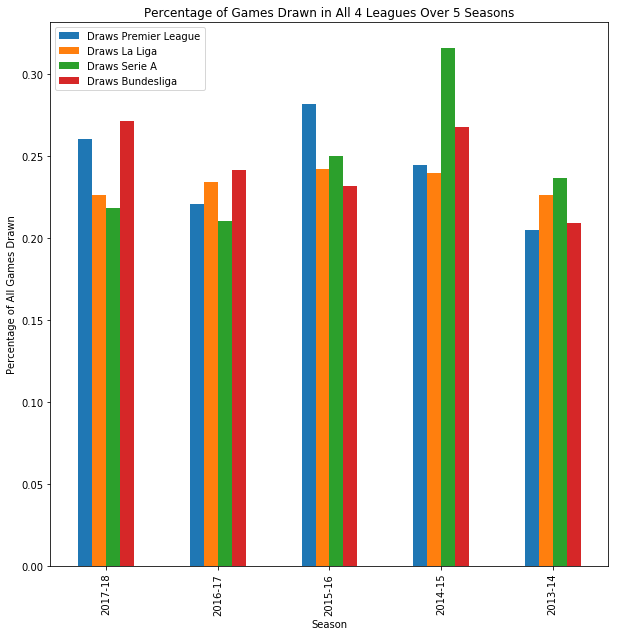

In [20]:
print(draw_percentage)
plt_percentage_draw = draw_percentage.plot.bar(x = 'Season',figsize=(10,10),title = "Percentage of Games Drawn in All 4 Leagues Over 5 Seasons" )
plt_percentage_draw.set_xlabel("Season")
plt_percentage_draw.set_ylabel("Percentage of All Games Drawn")


In [21]:
#Mean draw percentage in Premier League
draw_percentage["Draws Premier League"].mean()

0.24263157894736845

In [22]:
#Mean draw percentage in La Liga
draw_percentage["Draws La Liga"].mean()

0.2336842105263158

In [23]:
#Mean draw percentage in Serie A
draw_percentage["Draws Serie A"].mean()

0.2463157894736842

In [24]:
#Mean draw percentage in Bundesliga
draw_percentage["Draws Bundesliga"].mean()

0.24444444444444446

#### In looking over the percentage of games drawn per season, we see that the Serie A actually has the most percentage of games drawn, which is slightly more than in the Premier League and Bundesliga. When looking at how evenly matched teams are, the statistics point to the Serie A which over the last 5 seasons has had the highest percentage of matches drawn.The La Liga actually has the lowest percentage of games tied despite leading the previous metric. However, these differences I believe are not statistically signficant when taken into context. In over 1900 games played by each of the 3 20-team leagues, the Serie A only has about 25 more draws than the La Liga, which is the league with the lowest percentage of drawed games. With suck a large sample size of games, a small difference like that is not significant.

## Average Points Per Position

#### This metric will analyze the spread of the average number of points per position in each of the leagues over the past 5 seasons. A boxplot will be graphed for the five leagues. In order to get these averages, I will take the points column from each of the five seasons of a league, append them together and then find the average for each row and display the results with a boxplot for each league.

#### First I extract the Pts column from each season. Then I convert them to dataframes so I can use the concat funcntion on all 5 dataframes resulting in a single dataframe with 5 columns, where each column contains the points per position.

In [25]:
pl_1718pts = pl_1718["Pts"].to_frame()
pl_1617pts = pl_1617["Pts"].to_frame()
pl_1516pts = pl_1516["Pts"].to_frame()
pl_1415pts = pl_1415["Pts"].to_frame()
pl_1314pts = pl_1314["Pts"].to_frame()
plt_pts = pd.concat([pl_1718pts, pl_1617pts,pl_1516pts,pl_1415pts,pl_1314pts], axis=1, join_axes=[pl_1718pts.index])
#print(plt_pts.mean(axis=1))

In [26]:
ll_1718pts = ll_1718["Pts"].to_frame()
ll_1617pts = ll_1617["Pts"].to_frame()
ll_1516pts = ll_1516["Pts"].to_frame()
ll_1415pts = ll_1415["Pts"].to_frame()
ll_1314pts = ll_1314["Pts"].to_frame()
ll_pts = pd.concat([ll_1718pts,ll_1617pts,ll_1516pts,ll_1415pts,ll_1314pts],axis=1, join_axes=[ll_1718pts.index])
#print(ll_pts.mean(axis=1))

In [27]:
sa_1718pts = sa_1718["Pts"].to_frame()
sa_1617pts = sa_1617["Pts"].to_frame()
sa_1516pts = sa_1516["Pts"].to_frame()
sa_1415pts = sa_1415["Pts"].to_frame()
sa_1314pts = sa_1314["Pts"].to_frame()
sa_pts = pd.concat([sa_1718pts,sa_1617pts,sa_1516pts,sa_1415pts,sa_1314pts],axis=1, join_axes=[sa_1718pts.index])
#print(sa_pts.mean(axis=1))

In [28]:
bl_1718pts = bl_1718["Pts"].to_frame()
bl_1617pts = bl_1617["Pts"].to_frame()
bl_1516pts = bl_1516["Pts"].to_frame()
bl_1415pts = bl_1415["Pts"].to_frame()
bl_1314pts = bl_1314["Pts"].to_frame()
bl_pts = pd.concat([bl_1718pts,bl_1617pts,bl_1516pts,bl_1415pts,bl_1314pts], axis=1, join_axes=[bl_1718pts.index])
#print(bl_pts.mean(axis=1))

#### Plotting a boxplot of all the average points to visualize the spread

Text(0.5, 0.92, 'Average Number of Points Per Position in the Premier League, La Liga, Serie A, and Bundesliga')

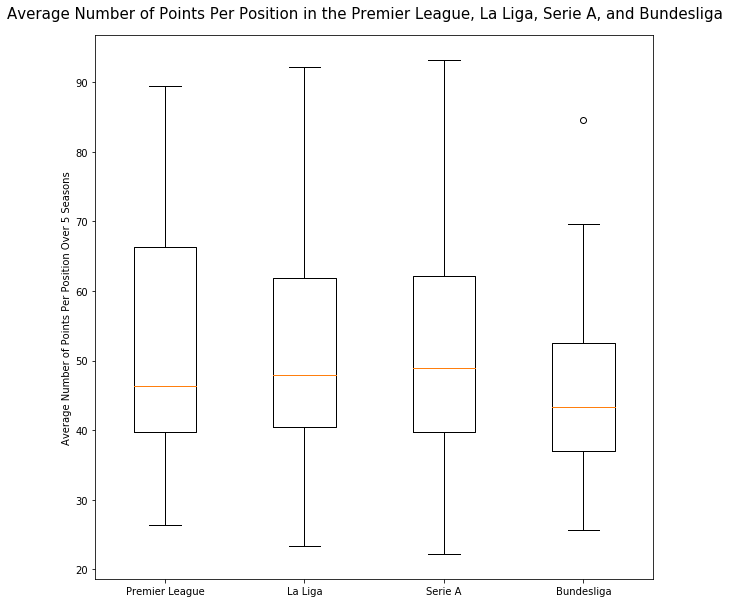

In [29]:
fig = plt.figure(figsize=(10,10))
plt.boxplot([plt_pts.mean(axis=1),ll_pts.mean(axis=1),sa_pts.mean(axis=1),bl_pts.mean(axis=1)])
plt.xticks([1,2,3,4], ["Premier League", "La Liga", "Serie A", "Bundesliga"])
plt.ylabel("Average Number of Points Per Position Over 5 Seasons")
fig.suptitle("Average Number of Points Per Position in the Premier League, La Liga, Serie A, and Bundesliga", fontsize=15, y=0.92)

In [30]:
#Standard deviation of the average number of points per position in the Premier League
plt_pts.mean(axis=1).std()

17.76305746560304

In [31]:
#Standard deviation of the average number of points per position in the La Liga
ll_pts.mean(axis=1).std()

18.87594961013116

In [32]:
#Standard deviation of the average number of points per position in the Serie A
sa_pts.mean(axis=1).std()

18.576258192140113

In [33]:
#Standard deviation of the average number of points per position in the Bundesliga
bl_pts.mean(axis=1).std()

14.694945998828873

In [34]:
#75th quartile of the average number of points per position in the Premier League
plt_pts.mean(axis=1).quantile(q=.75)

66.25

In [35]:
#75th quartile of the average number of points per position in the La Liga
ll_pts.mean(axis=1).quantile(q=.75)

61.900000000000006

In [36]:
#75th quartile of the average number of points per position in the Serie A
sa_pts.mean(axis=1).quantile(q=.75)

62.2

In [37]:
#Range between of the average number of points per position in the Premier League 
plt_pts.mean(axis=1).max() - plt_pts.mean(axis=1).min()

63.00000000000001

In [38]:
#Range between of the average number of points per position in the La Liga 
ll_pts.mean(axis=1).max() - ll_pts.mean(axis=1).min()

68.80000000000001

In [39]:
#Range between of the average number of points per position in the Serie A
sa_pts.mean(axis=1).max() - sa_pts.mean(axis=1).min()

71.0

#### In analyzing the boxplots of the four leagues we see that the Bundesliga has much tighter spread compared to the other leagues and has an outlier at the first placed team's average points. That outlier can actually be connected back to our first metric where we found that the difference between first and second place over the last five seasons has been the greatest in the Bundesliga which is why the first place team is an outlier in this boxplot. The tighter spread can also be explained by the fact that the Bundesliga consists of 18 teams while the 3 other leagues consist of 20. Apart from the Bundesliga, the Premier League has the least spread, hence the lowest standard deviation, illustrating that on average, the teams are more tightly packed in terms of points in the Premier League. 

#### Another thing to notice from this boxplot is that the Premer League also has the lowest range when compared with the 2 other 20-team leagues, the Serie A and La Liga. The last place finishing teams in the Premier League, on average, rack up more points than the last place finishing teams in the other two leagues, all while the top place finishing teams also finish with less points than in the Serie A and La Liga. Later, I will determine whether there is a relationship between this data and how successful leagues are in the Champions League.

## Performance in Champions League

#### This metric is unique from the rest since it measures the success of the leagues in a head to head competition where the various teams from various leagues compete directly against eachother. All the other metrics focus on domestic variables, but in the Champions League, all the top teams from the leagues are placed against eachother. In this metric I will see how many teams from each of the leagues made it into the round of 16 of the champions league. The numbers from the columns won't add up to 16 as there are often teams from leagues that aren't covered by this research that make it into the round of 16, such as teams from the French, Portuguese, Turkish, or Ukrainian leagues.

#### For this metric I will manually enter the amount of teams per league in the past 5 Champions Leagues

In [40]:
r16 = pd.DataFrame(np.array([ ["2017-18",5,3,2,1],["2016-17",3,3,2,3],["2015-16",3,3,2,2],["2014-15",3,3,1,4],['2013-14',4,3,1,4] ]), columns = ['Season', "# of Premier League Teams", "# of La Liga Teams", "# of Serie A Teams", "# of Bundesliga Teams"])
#Converting each column to numeric bc otherwise I receive an error while trying to plot:Empty 'DataFrame': no numeric data to plot
r16["# of Premier League Teams"] = pd.to_numeric(r16["# of Premier League Teams"])
r16["# of La Liga Teams"] = pd.to_numeric(r16["# of La Liga Teams"])
r16["# of Serie A Teams"] = pd.to_numeric(r16["# of Serie A Teams"])
r16["# of Bundesliga Teams"] = pd.to_numeric(r16["# of Bundesliga Teams"])
print(r16)

    Season  # of Premier League Teams  # of La Liga Teams  # of Serie A Teams  \
0  2017-18                          5                   3                   2   
1  2016-17                          3                   3                   2   
2  2015-16                          3                   3                   2   
3  2014-15                          3                   3                   1   
4  2013-14                          4                   3                   1   

   # of Bundesliga Teams  
0                      1  
1                      3  
2                      2  
3                      4  
4                      4  


Text(0, 0.5, '# of Teams in Round of 16')

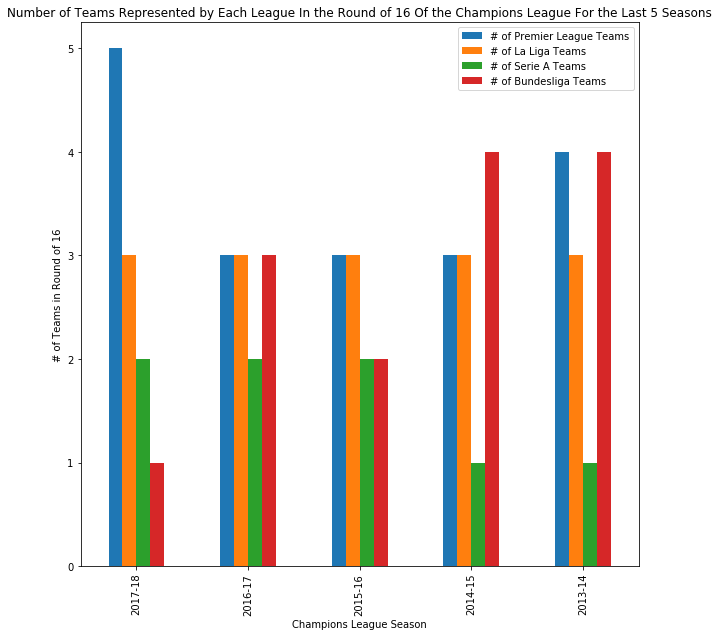

In [41]:
r16_plt = r16.plot(x = "Season",kind = "bar",figsize=(10,10), title = "Number of Teams Represented by Each League In the Round of 16 Of the Champions League For the Last 5 Seasons")
r16_plt.set_xlabel("Champions League Season")
r16_plt.set_ylabel("# of Teams in Round of 16")

In [42]:
#Mean number of Premier League teams making it into the round 16 of the Champions League
r16["# of Premier League Teams"].mean()

3.6

In [43]:
#Mean number of La Liga teams making it into the round 16 of the Champions League
r16["# of La Liga Teams"].mean()

3.0

In [44]:
#Mean number of Serie A teams making it into the round 16 of the Champions League
r16["# of Serie A Teams"].mean()

1.6

In [45]:
#Mean number of La Liga teams making it into the round 16 of the Champions League
r16["# of Bundesliga Teams"].mean()

2.8

#### We can quite clearly see that when Champions League success is considered, the Premier League takes the crown with consistently having either the most or tied for the most teams making it to the round of 16 over the last 5 seasons. In a head to head competition where each of these leagues compete directly against eachother, the Premier League has consistently been the most represented league in the late stages of the Champions League. We can also see when international competition is considered, Italian teams have over the past 5 seasons been the weakest with on average having 2 or less teams make it to the round of 16.

#### In this next section I perform a bit of regression analysis to see if any of the previosly mentioned domestic league metrics have a relationship with a league's success in the Champions League. For example, does a low difference in points between first and second relate to that league's representation in the round of 16 of the Champions League. In order to perfrom this testing, I will manually construct a dataframe to hold the data. I ommited league labels as in this section we are only looking at the relationship between the variables within the leagues rather than the leagues themselves.

In [65]:
reg_test = pd.DataFrame(np.array([ [5,19,25,.260],
                                  [3,7,17,.221], 
                                  [3,10,15,.281], 
                                  [3,8,17,.244], 
                                  [4,2,7,.205],
                                  [3,14,20,.226],
                                  [3,3,21,.234],
                                 [3,1,27,.242],
                                 [3,2,17,.239],
                                 [3,3,20,.226],
                                 [2,4,23,.218],
                                 [2,4,19,.210],
                                 [2,9,24,.250],
                                 [1,17,23,.315],
                                 [1,17,37,.236],
                                  [1,21,29,.271],
                                  [3,15,20,.241],
                                  [2,10,33,.232],
                                  [4,10,18,.268],
                                  [4,19,29,.209],
                                 ])
        
        ,columns = ["Teams in Round of 16", "Diff. Between First and Second","Diff. Between First and Fourth", "Percentage of Games Drawn"])
print(reg_test)

    Teams in Round of 16  Diff. Between First and Second  \
0                    5.0                            19.0   
1                    3.0                             7.0   
2                    3.0                            10.0   
3                    3.0                             8.0   
4                    4.0                             2.0   
5                    3.0                            14.0   
6                    3.0                             3.0   
7                    3.0                             1.0   
8                    3.0                             2.0   
9                    3.0                             3.0   
10                   2.0                             4.0   
11                   2.0                             4.0   
12                   2.0                             9.0   
13                   1.0                            17.0   
14                   1.0                            17.0   
15                   1.0                

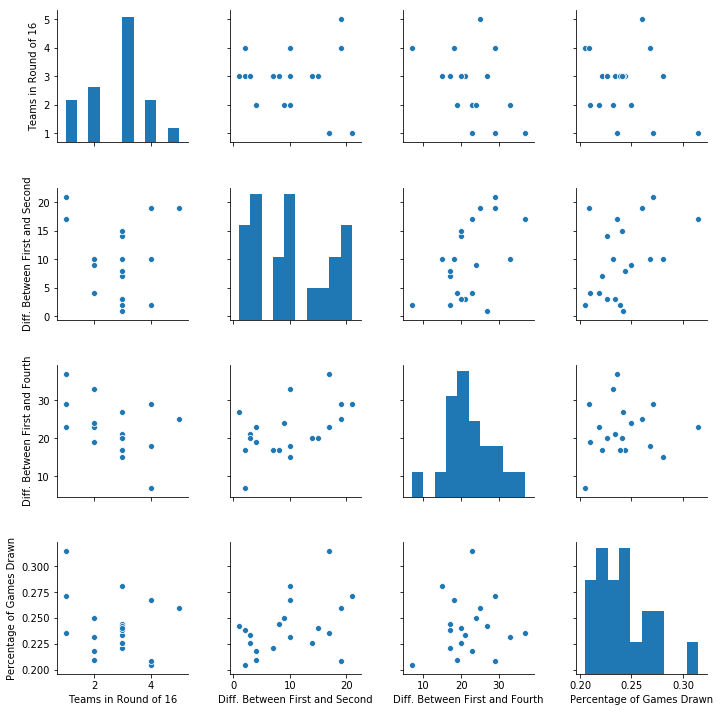

In [66]:
sns.pairplot(reg_test)

#### Looking at the row and columns for "Teams in Round of 16" we see that there is no apparent relationship between a league's success in the Champions League and one of it's domestic metrics. However, when looking at the scatterplot of the relationship between "Diff. Between First and Second" and "Percentage of Games Drawn" there may be some relationship between the two. The following section will take a deeper look into that relationship.

Text(0.5, 0.92, 'Difference Between First and Second vs Percentage of Games Drawn That Season')

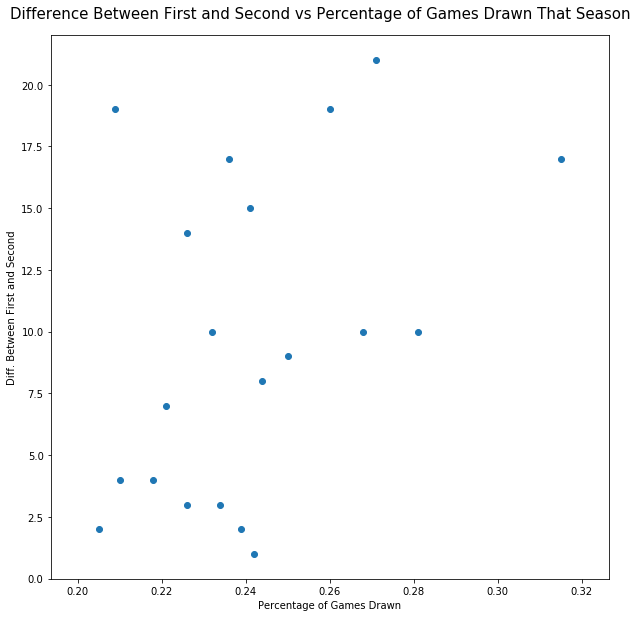

In [52]:
fig = plt.figure(figsize=(10,10))
plt.scatter(reg_test["Percentage of Games Drawn"], reg_test["Diff. Between First and Second"])
plt.xlabel("Percentage of Games Drawn")
plt.ylabel("Diff. Between First and Second")
fig.suptitle("Difference Between First and Second vs Percentage of Games Drawn That Season", fontsize=15, y=0.92)

In [53]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [57]:
#Extracting Slope, Intercept, Predicted Value, and Residuals from "Percentage of Games Drawn" and "Diff. Between First and Second" using the function from in-class
slope, intercept, predictions, residuals = evaluate_linear_relationship(reg_test["Percentage of Games Drawn"], reg_test["Diff. Between First and Second"])


Text(0.5, 0.92, 'Difference Between First and Second vs Percentage of Games Drawn That Season')

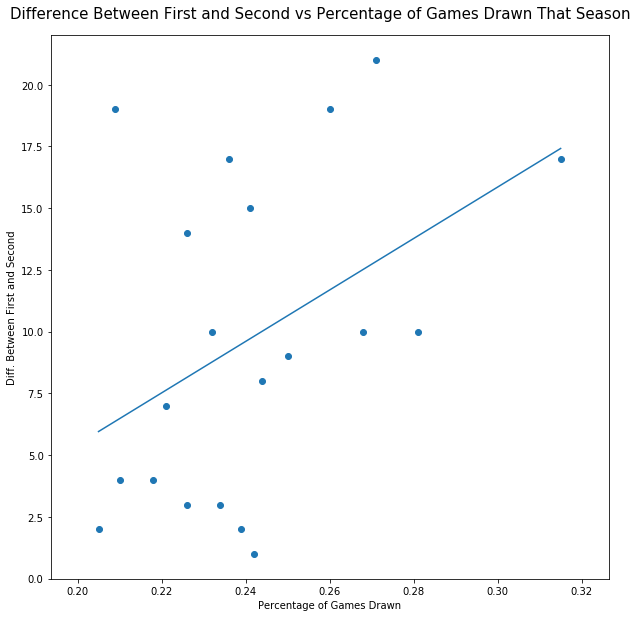

In [56]:
fig = plt.figure(figsize=(10,10))
plt.scatter(reg_test["Percentage of Games Drawn"], reg_test["Diff. Between First and Second"])
sorted_order = np.argsort(reg_test["Percentage of Games Drawn"])
plt.plot(reg_test["Percentage of Games Drawn"][sorted_order], predictions[sorted_order])
plt.xlabel("Percentage of Games Drawn")
plt.ylabel("Diff. Between First and Second")
fig.suptitle("Difference Between First and Second vs Percentage of Games Drawn That Season", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Residuals')

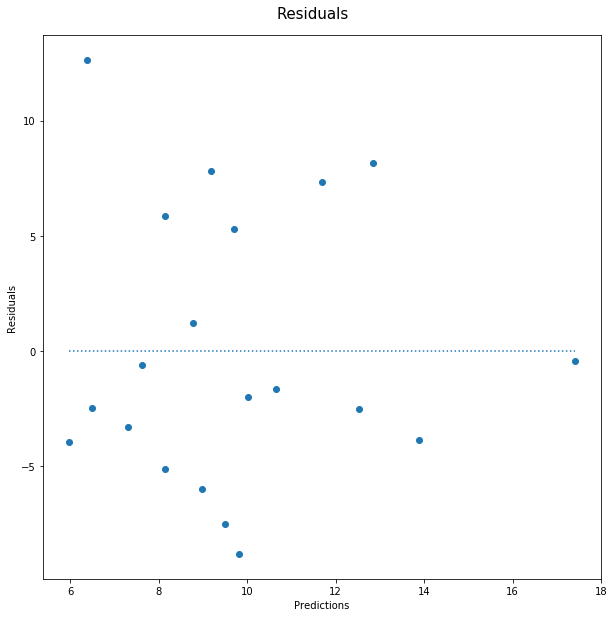

In [59]:
fig = plt.figure(figsize=(10,10))
plt.scatter(predictions,residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle="dotted")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [61]:
#R-squared value
np.var(predictions) / np.var(reg_test["Diff. Between First and Second"])

0.18644395439865336

In [75]:
#Correlation and P-value
stats.pearsonr(reg_test["Percentage of Games Drawn"], reg_test["Diff. Between First and Second"])

(0.43179156360291876, 0.0572883064558713)

## In the residual plot, we can see that there is a potential outlier. The value with a residual of about 14 is significantly greater than the rest. In the following section I will redo the scatter and residual plots without the aforementioned outlier.

In [71]:
#Redoing the dataframe except with the outlier omitted
reg_test_wo_outlier = pd.DataFrame(np.array([ [5,19,25,.260],
                                  [3,7,17,.221], 
                                  [3,10,15,.281], 
                                  [3,8,17,.244], 
                                  [4,2,7,.205],
                                  [3,14,20,.226],
                                  [3,3,21,.234],
                                 [3,1,27,.242],
                                 [3,2,17,.239],
                                 [3,3,20,.226],
                                 [2,4,23,.218],
                                 [2,4,19,.210],
                                 [2,9,24,.250],
                                 [1,17,23,.315],
                                 [1,17,37,.236],
                                  [1,21,29,.271],
                                  [3,15,20,.241],
                                  [2,10,33,.232],
                                  [4,10,18,.268],
                                 ])
        
        ,columns = ["Teams in Round of 16", "Diff. Between First and Second","Diff. Between First and Fourth", "Percentage of Games Drawn"])

Text(0.5, 0.92, 'Difference Between First and Second vs Percentage of Games Drawn That Season Without Outlier')

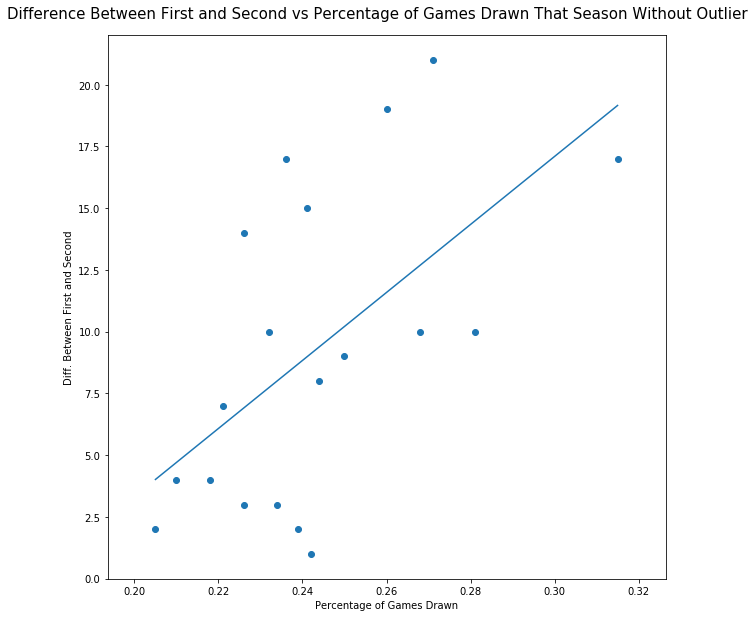

In [67]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(reg_test_wo_outlier["Percentage of Games Drawn"], reg_test_wo_outlier["Diff. Between First and Second"])
fig = plt.figure(figsize=(10,10))
plt.scatter(reg_test_wo_outlier["Percentage of Games Drawn"], reg_test_wo_outlier["Diff. Between First and Second"])
sorted_order = np.argsort(reg_test_wo_outlier["Percentage of Games Drawn"])
plt.plot(reg_test_wo_outlier["Percentage of Games Drawn"][sorted_order], predictions[sorted_order])
plt.xlabel("Percentage of Games Drawn")
plt.ylabel("Diff. Between First and Second")
fig.suptitle("Difference Between First and Second vs Percentage of Games Drawn That Season Without Outlier", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Residuals Without Outlier')

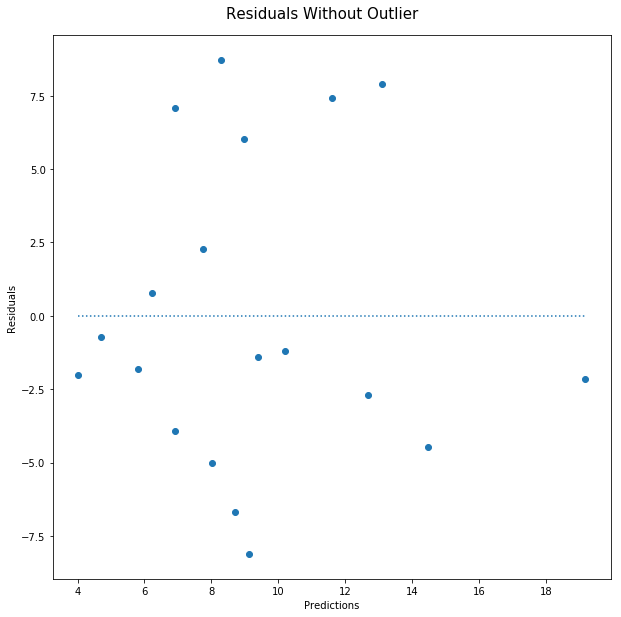

In [69]:
fig = plt.figure(figsize=(10,10))
plt.scatter(predictions,residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle="dotted")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
fig.suptitle('Residuals Without Outlier', fontsize=15, y=0.92)

In [72]:
#R-squared value
np.var(predictions) / np.var(reg_test_wo_outlier["Diff. Between First and Second"])

0.3369894976068725

In [76]:
#Correlation and P-value
stats.pearsonr(reg_test_wo_outlier["Percentage of Games Drawn"], reg_test_wo_outlier["Diff. Between First and Second"])

(0.5805079651536856, 0.009161721506346308)

In [81]:
print(slope / 100)

1.376672883740715


#### In removing the outlier, we see that our R-squared, and correlation increased while our p-value dropped. Our R-squared value went from .19 to .34, the correlation went from .43 to .58, and the p-value from .057 to a strong .009. With a final R-Squared value of .34, 34% of our variance of differences in points between first and second place teams can be explained by the our linear model.

#### Our final correlation value of .58 means that there is a moderate positive correlation between the two variables which is also evident in our analysis of the R-squared value and slope. More specifically, for every .01 increase in percentage of total games drawn that season, we except to see the difference between first and second to increase by 1.37 points. So, an interesting pattern to conclude here is that the more games that are drawn in a season, the greater the gap between first and second place is.

#### In removing the outlier, our p-value made a significant shift from .05 to .009 and in doing so greatly impacted our concluding thoughts. Our p-value of .009 is less than .05 which means that we can reject the null hypothesis that there is no relationship between the percentage of games drawn in a season and the point gap between the first and second place finishers.

## Conclusion

#### Here is a quick recap of which leagues led in which metrics
- Difference between first and second: La Liga (4.6 point average difference)
- Difference between first and fourth: Premier League (16.2 point average difference)
- Average points per position: Premier League (had the tightest spread of the 3 20-team leagues)
- Highest percentage of games drawn per season: Serie A
- Most teams in Champions League round of 16: Premier League

#### While the metrics don't all align and point to one clear winner, according to the data from the past 5 seasons, it appears that the Premier League leads in the majority of the metrics. Also, in investigating some potential relationships between domestic league variables, I found that there is a moderately-strengthed relationship between the percentage of games drawn and the gap between first and second placed teams. Also, in analyzing these domestic variables against success in the Champions League, I was not able to find a meaningful or significant relationship. 